<a href="https://colab.research.google.com/github/vidyam99/MLPlayer/blob/master/Data_Preprocessig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Pre-Processing Techniques

In [2]:
# main libraries
import pandas as pd
import numpy as np
import time
# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# Read the data in the CSV file using pandas
#creditcardfraud/creditcard.csv
file = input('Enter the dataset: ');
# Making a list of missing value types
missing_values = ["n/a", "na", "--", "-", "NA", "Na", "aN", "NaN"]
df = pd.read_csv('drive/My Drive/kjsce hack/'+file, na_values = missing_values)
df.head()

Enter the dataset: property data.csv


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0


##Validating data

In [0]:
# Detecting different formats
for c in df.columns:
  cnt = 0
  for row in df.loc[:,c]:
    try:
      if(df[c].dtype==int):
        int(row)
      elif(df[c].dtype==float):
        float(row)
    except ValueError:
      df.loc[cnt, c]=np.nan
    try:
      if(df[c].dtype==str):
        if(int(row) or float(row)):
          df.loc[cnt, c]=np.nan
      elif(df[c].dtype==bool and (row not in ['TRUE','FALSE'])):
          df.loc[cnt, c]=np.nan
    except ValueError:
      print("Data is valid")
    cnt+=1

In [0]:
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0


In [7]:
df.loc[[0]]

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0


##Filling in **Missing** Values

In [0]:
print(df.isnull().any().sum())
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

6
Number of null values in each column:
PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    3
NUM_BATH        1
SQ_FT           2
dtype: int64


In [0]:
print(df.columns)
primary = input('Enter the column names which is to be treated as primary key separated by commas: ').split(",")
print(primary)

Index(['PID', 'ST_NUM', 'ST_NAME', 'OWN_OCCUPIED', 'NUM_BEDROOMS', 'NUM_BATH',
       'SQ_FT'],
      dtype='object')
Enter the column names which is to be treated as primary key separated by commas: PID
['PID']


In [0]:
if(df.isnull().any().sum()!=0):
  print('The dataset contains missing values')
  half_count = len(df) / 2
  df = df.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
  print('The columns containing more than 50% missing values dropped')
  ch=input('Do you want to ignore entries containing missing values(y/n): ')
  if(ch=='y'):
    df = df.dropna()
    print('Entries with missing values dropped')
  else:
    # Replace using median 
    print('The null values will be filled with the most frequent value or median')
    for c in df.columns:
      if(df[c].dtype==int or df[c].dtype==float and (c not in primary)):
        df[c] = df[c].fillna(df[c].median())
    df = df.dropna()

In [0]:
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,950.0
2,100003000.0,203.0,LEXINGTON,N,2.5,1,850.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,2.5,1,800.0


##Dropping columns if any with only one value

In [0]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1]

##Distribution of features

In [0]:
print("Data types and their frequency\n{}".format(df.dtypes.value_counts()))

Data types and their frequency
float64    4
object     3
dtype: int64


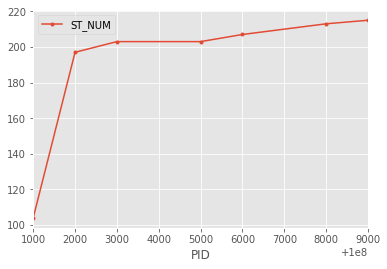

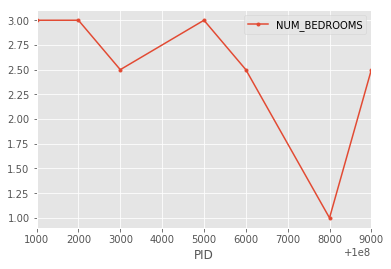

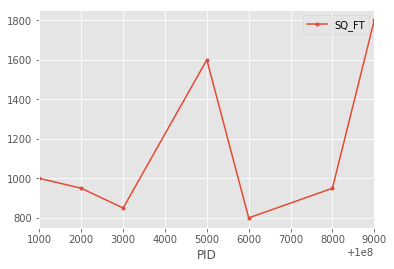

In [0]:
pri = primary[0]
if(len(primary)>1):
  pri = input('Choose the key primary key for which you choose to visualize data: '+primary)
for c in df.columns:
  if(c not in primary and df[c].dtype!=object):
    df.plot(x='PID',y=c,marker='.')
 

In [0]:
useless = input('Select the feature which is useless').split(',')
for i in useless:
  df = df.drop([i],axis=1)

Select the feature which is uselessSQ_FT


In [0]:
df.head()


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH
0,100001000.0,104.0,PUTNAM,Y,3.0,1
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5
2,100003000.0,203.0,LEXINGTON,N,2.5,1
4,100005000.0,203.0,BERKELEY,Y,3.0,2
5,100006000.0,207.0,BERKELEY,Y,2.5,1


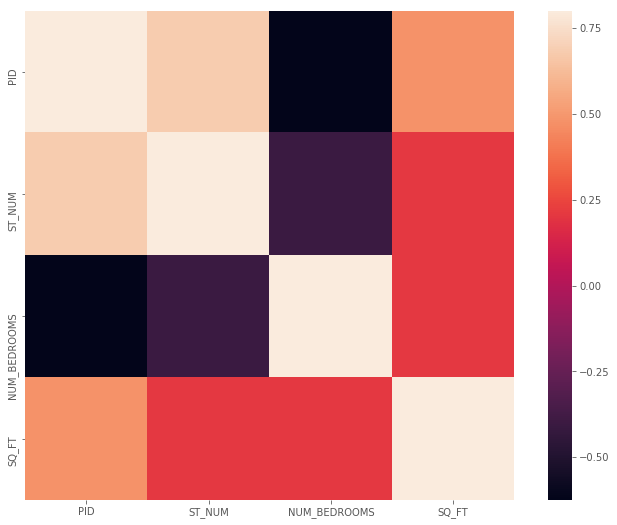

In [0]:
# heat map of correlation of features
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

##Converting Data to Same Case

In [0]:
df = df.apply(lambda x: x.astype(str).str.upper())

In [0]:
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH
0,100001000.0,104.0,PUTNAM,Y,3.0,1
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5
2,100003000.0,203.0,LEXINGTON,N,2.5,1
4,100005000.0,203.0,BERKELEY,Y,3.0,2
5,100006000.0,207.0,BERKELEY,Y,2.5,1


##Normalisation

##Noise Reduction